In [6]:
import sys
sys.path.insert(1, '../../ana_tools')
import getters, tools, graphic_tools, setters
import matplotlib.pyplot as plt
plt.style.use('../../ana_tools/presentation.mplstyle')
import numpy as np
path = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/"
plateaus = getters.get_plateaus()
colors = {"Wav1-1":"blue", "Wav1-2":"orange", "Wav1-3":"red", "Wav1-4":"green",
          "Wav2-1":"yellow", "Wav2-2":"black", "Wav2-3":"grey", "Wav2-4":"purple", "Wav2-5":"darkred"}

/eos/home-d/dunetms/SWAN_projects/FBG_TMS
/eos/home-d/dunetms/SWAN_projects/FBG_TMS/ana_tools/plateaus.json


In [25]:
#Function to calculate the differences between the offsets of the runs
def diff(dates):
    caunt={}
    for date in dates: 
        peaks = getters.get_raw_data(path_to_split=path+date+"/", filetype="peaks", pol="Av").sort_values(by="Timestamp").reset_index(drop=True)
        caunt[date]={}
        for sens in peaks.columns:
            if sens == "Timestamp" or sens[3]=="2":
                continue
            a=[]
            for plateau in plateaus[date]:
                if plateau=="273_down" or plateau[4]=="u":
                    continue
                t0 = plateaus[date][plateau][0]
                tf = plateaus[date][plateau][1]
                pcut = peaks.loc[(peaks["Timestamp"]>t0) & (peaks["Timestamp"]<tf)].reset_index(drop=True)
                a.append(1e12*np.mean(pcut[sens]-pcut["Wav1-1"]))
            caunt[date][sens]= a
    return caunt


def plots_offsets(dates,colors):
    fig, axes = graphic_tools.make_figure(ncols=2, nrows=2)
    fig.set_size_inches(20, 10)
    fig.suptitle("Offsets")
    for date in dates:
        peaks = getters.get_raw_data(path_to_split=path+date+"/", filetype="peaks", pol="Av").sort_values(by="Timestamp").reset_index(drop=True)
        for plateau in plateaus[date]:
            exclude=["273_down", "273_up","263_up","283_up","293_up","263_down","283_down","293_down"]
            if plateau in exclude:
                continue
            cnt = 0
            t0 = plateaus[date][plateau][0]
            if date=="20230223":
                t0= plateaus[date][plateau][0]+10000
            tf = plateaus[date][plateau][1]
            pcut = peaks.loc[(peaks["Timestamp"]>t0) & (peaks["Timestamp"]<tf)].reset_index(drop=True)
            for sens in peaks.columns:
                if sens == "Timestamp" or sens[3]=="1":
                    continue
                axes[cnt].errorbar(int(plateau.split("_")[0]),
                                 1e12*np.mean(pcut[sens]-pcut["Wav2-1"]),
                                   fmt="o",
                                   yerr=1e12*np.std(pcut[sens]-pcut["Wav2-1"]),
                                   capsize=5,
                                 color=colors[date])
                axes[cnt].set_title(sens + " - Wav2-1")
                axes[cnt].set_xlabel("Temperature (K)")
                axes[cnt].set_ylabel("Wavelength offset (pm)")
                cnt += 1
    fig.show()
    del fig
    del axes

# All february runs


Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]


Keys to read: ['10Av2', '1Av1', '1Av2', '1Av3', '2Av1', '2Av2', '2Av3', '3Av1', '3Av2', '3Av3', '4Av1', '4Av2', '4Av3', '5Av1', '5Av2', '5Av3', '6Av1', '6Av2', '6Av3', '7Av1', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 23/23 [00:10<00:00,  2.12it/s]


Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 14/14 [00:04<00:00,  3.33it/s]


Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [01:14<00:00,  1.18s/it]


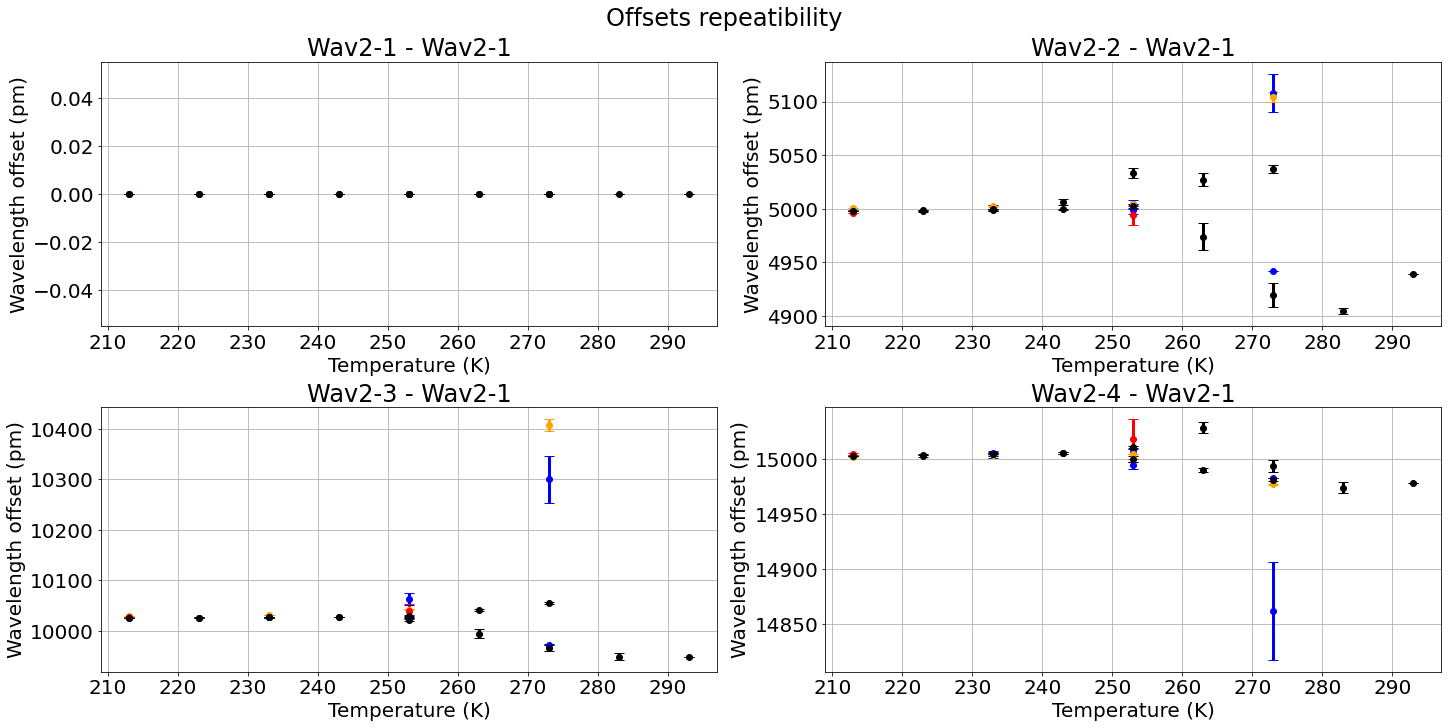

In [20]:
dates = ["20230221", "20230222", "20230223", "20230224"]
colors = {"20230221":"blue", "20230222":"orange", "20230223":"red", "20230224":"black"}
fig, axes = graphic_tools.make_figure(ncols=2, nrows=2)
fig.set_size_inches(20, 10)
fig.suptitle("Offsets repeatibility")
for date in dates:
    peaks = getters.get_raw_data(path_to_split=path+date+"/", filetype="peaks", pol="Av").sort_values(by="Timestamp").reset_index(drop=True)
    for plateau in plateaus[date]:
        cnt = 0
        t0 = plateaus[date][plateau][0]
        tf = plateaus[date][plateau][1]
        pcut = peaks.loc[(peaks["Timestamp"]>t0) & (peaks["Timestamp"]<tf)].reset_index(drop=True)
        for sens in peaks.columns:
            if sens == "Timestamp" or sens[3]=="1":
                continue
            if plateau[5]=="u":
                axes[cnt].errorbar(int(plateau.split("_")[0]),1e12*np.mean(pcut[sens]-pcut["Wav2-1"]),fmt="o",yerr=1e12*np.std(pcut[sens]-pcut["Wav2-1"]),capsize=5,color=colors[date],alpha=0.5)  
            axes[cnt].errorbar(int(plateau.split("_")[0]),
                             1e12*np.mean(pcut[sens]-pcut["Wav2-1"]),
                               fmt="o",
                               yerr=1e12*np.std(pcut[sens]-pcut["Wav2-1"]),
                               capsize=5,
                             color=colors[date])
            axes[cnt].set_title(sens + " - Wav2-1")
            axes[cnt].set_xlabel("Temperature (K)")
            axes[cnt].set_ylabel("Wavelength offset (pm)")
            cnt += 1

# Run 20230121

Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]


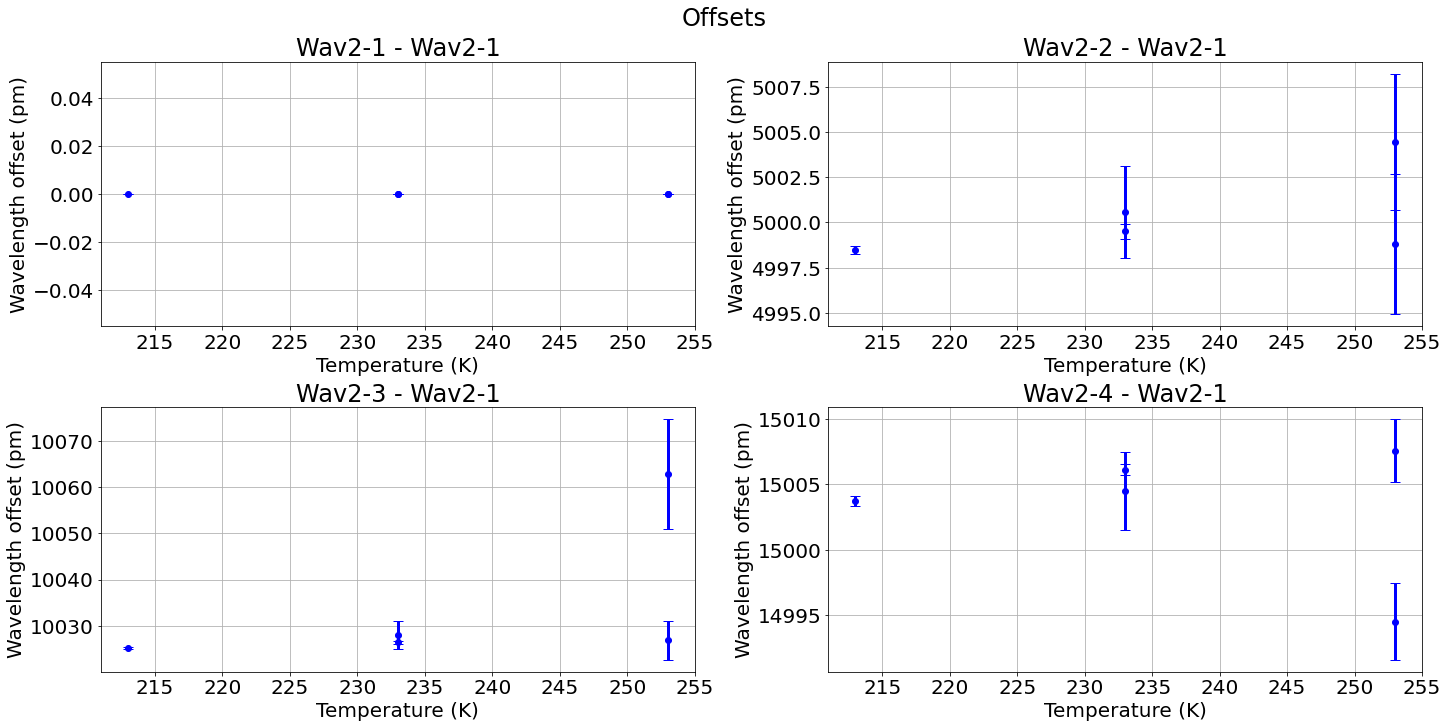

In [18]:
dates = ["20230221"]
colors = {"20230221":"blue", "20230222":"orange"}
plots_offsets(dates,colors)

# Run 20230122

Keys to read: ['10Av2', '1Av1', '1Av2', '1Av3', '2Av1', '2Av2', '2Av3', '3Av1', '3Av2', '3Av3', '4Av1', '4Av2', '4Av3', '5Av1', '5Av2', '5Av3', '6Av1', '6Av2', '6Av3', '7Av1', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 23/23 [02:57<00:00,  7.72s/it]


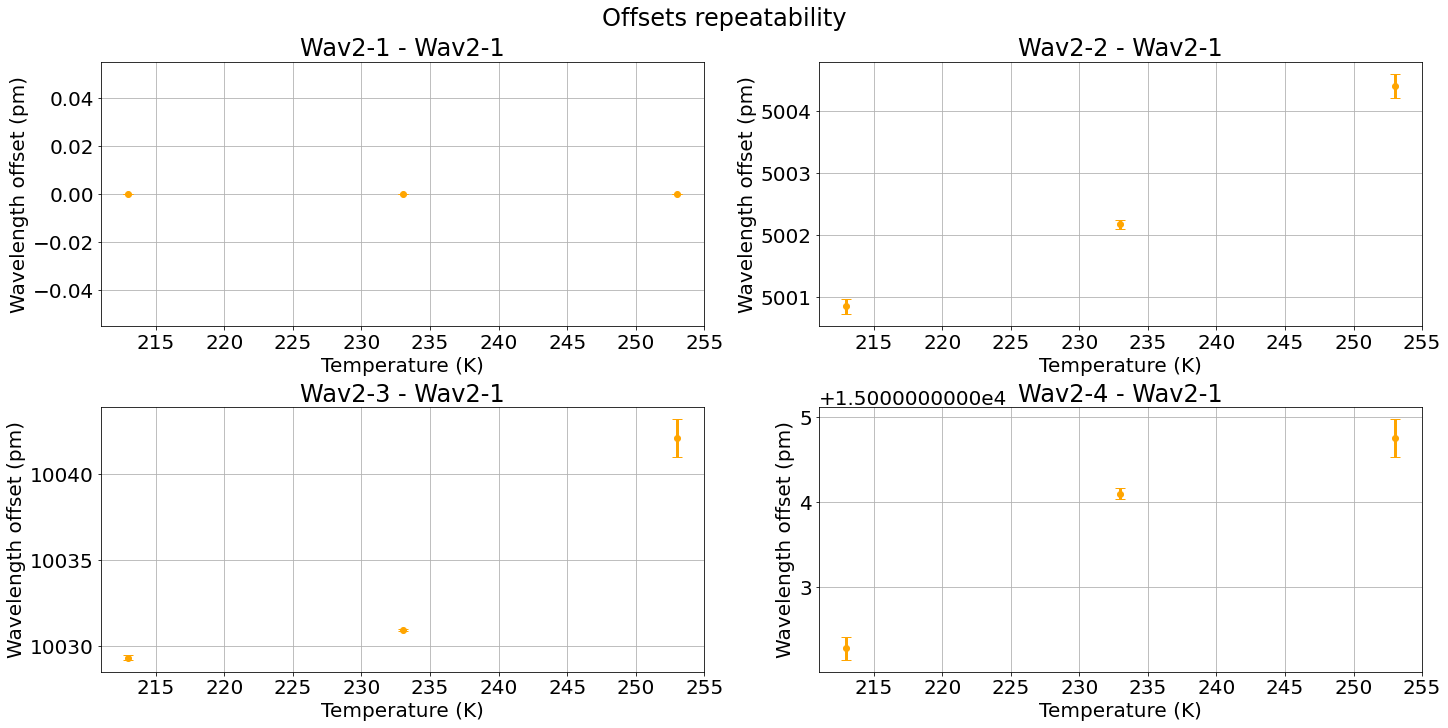

In [10]:
dates = ["20230222"]
colors = {"20230221":"blue", "20230222":"orange"}
plots_offsets(dates,colors)

# Run 20230223

Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 14/14 [00:05<00:00,  2.77it/s]


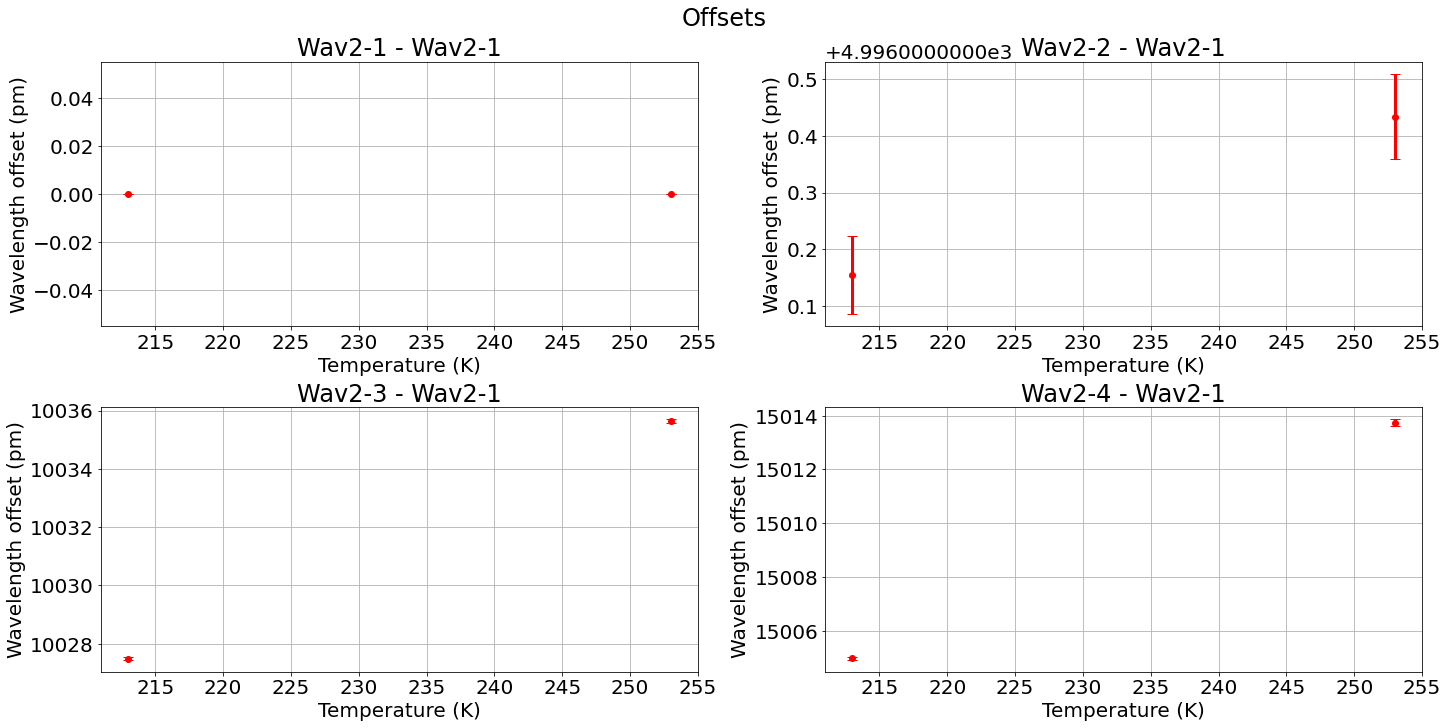

In [26]:
dates = ["20230223"]
colors = {"20230221":"blue", "20230222":"orange", "20230223":"red", "20230224":"black"}
plots_offsets(dates,colors)

# Run 20230224

Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [01:07<00:00,  1.07s/it]


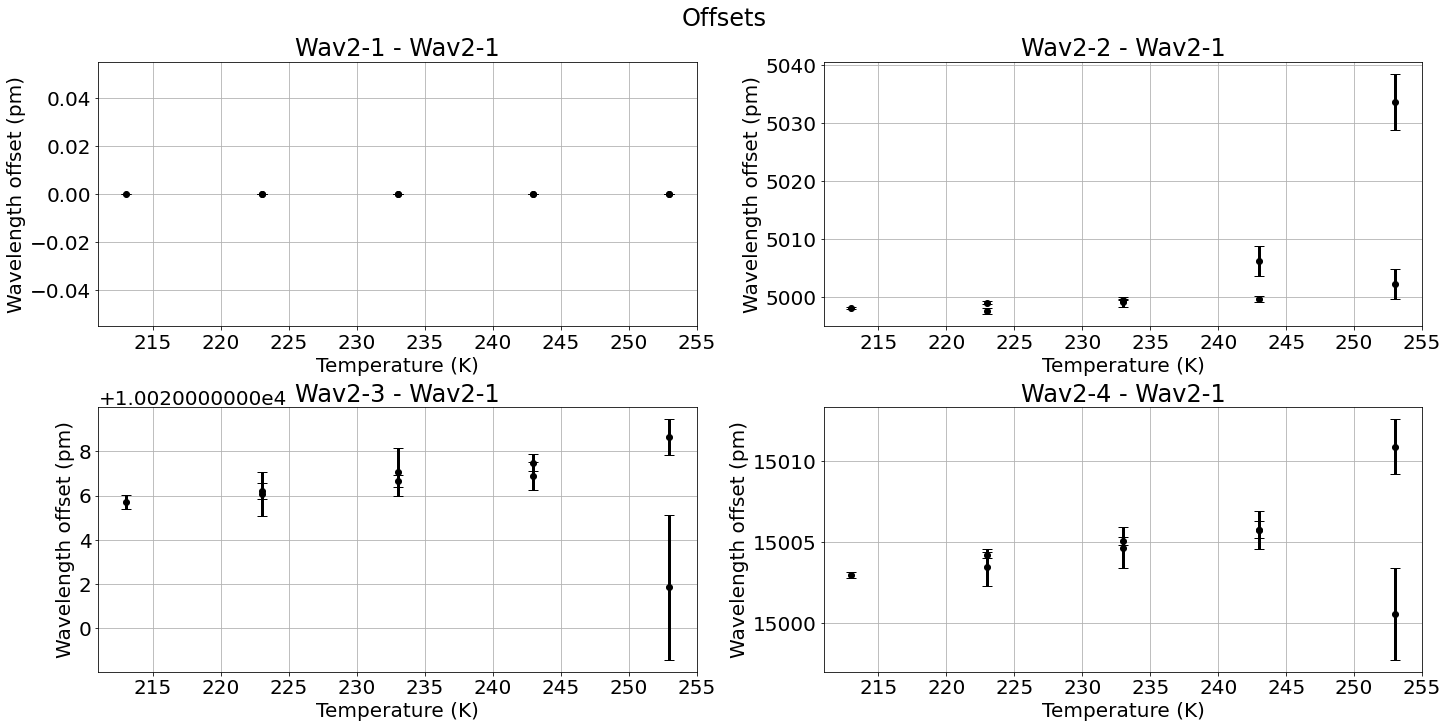

In [19]:
dates = ["20230224"]
colors = {"20230221":"blue", "20230222":"orange", "20230223":"red", "20230224":"black"}
plots_offsets(dates,colors)

# Repeatability of February Runs 

## 20230221 and 20230222

Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [00:11<00:00,  2.04it/s]


Keys to read: ['10Av2', '1Av1', '1Av2', '1Av3', '2Av1', '2Av2', '2Av3', '3Av1', '3Av2', '3Av3', '4Av1', '4Av2', '4Av3', '5Av1', '5Av2', '5Av3', '6Av1', '6Av2', '6Av3', '7Av1', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 23/23 [00:10<00:00,  2.28it/s]


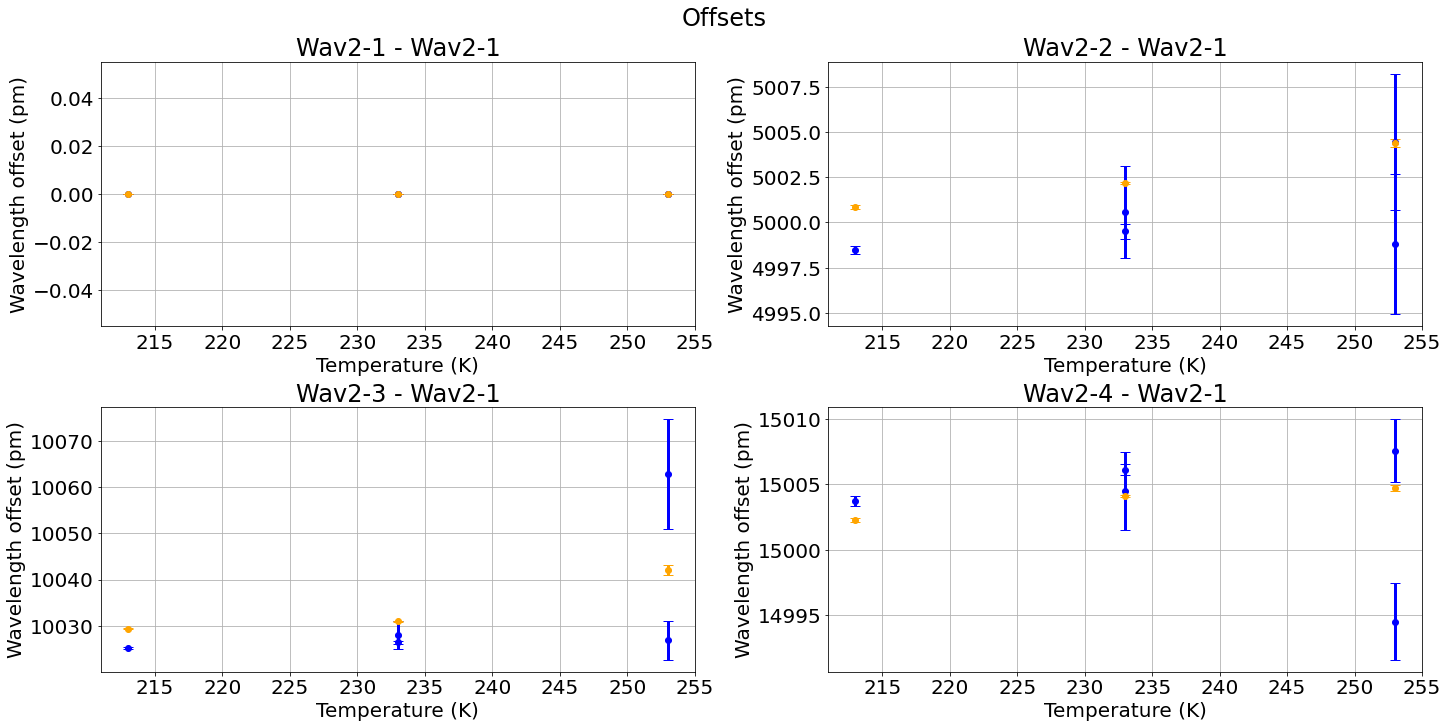

In [22]:
dates = ["20230221", "20230222"]
colors = {"20230221":"blue", "20230222":"orange"}
plots_offsets(dates,colors)


In [18]:
dates = ["20230221", "20230222"]
caunt=diff(dates)
print("Differences between the offsets of the dates "+ dates[0] +" and " +dates[1]+" for each sensor, only when decreasing the temperature")
for wav in caunt["20230221"]:
    if wav[-1]=="1":
        continue
    print("Sensor"+wav+", the mean value: %.2f std: %.2f"  %(
        np.mean(np.array(caunt["20230221"][wav])-np.array(caunt["20230222"][wav])),
        np.std(np.array(caunt["20230221"][wav])-np.array(caunt["20230222"][wav]))
         ))

Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [00:06<00:00,  3.33it/s]


Keys to read: ['10Av2', '1Av1', '1Av2', '1Av3', '2Av1', '2Av2', '2Av3', '3Av1', '3Av2', '3Av3', '4Av1', '4Av2', '4Av3', '5Av1', '5Av2', '5Av3', '6Av1', '6Av2', '6Av3', '7Av1', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 23/23 [00:06<00:00,  3.44it/s]


Differences between the offsets of the dates 20230221 and 20230222 for each sensor, only when decreasing the temperature
SensorWav1-2, the mean value: 24.55 std: 1.33
SensorWav1-3, the mean value: 8.86 std: 1.56
SensorWav1-4, the mean value: 36.36 std: 8.46
SensorWav1-5, the mean value: 54.91 std: 7.84


## 20230221, 20230222  and 20230224

Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [00:10<00:00,  2.13it/s]


Keys to read: ['10Av2', '1Av1', '1Av2', '1Av3', '2Av1', '2Av2', '2Av3', '3Av1', '3Av2', '3Av3', '4Av1', '4Av2', '4Av3', '5Av1', '5Av2', '5Av3', '6Av1', '6Av2', '6Av3', '7Av1', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 23/23 [00:11<00:00,  1.99it/s]


Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 14/14 [00:04<00:00,  3.20it/s]


Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [01:09<00:00,  1.11s/it]


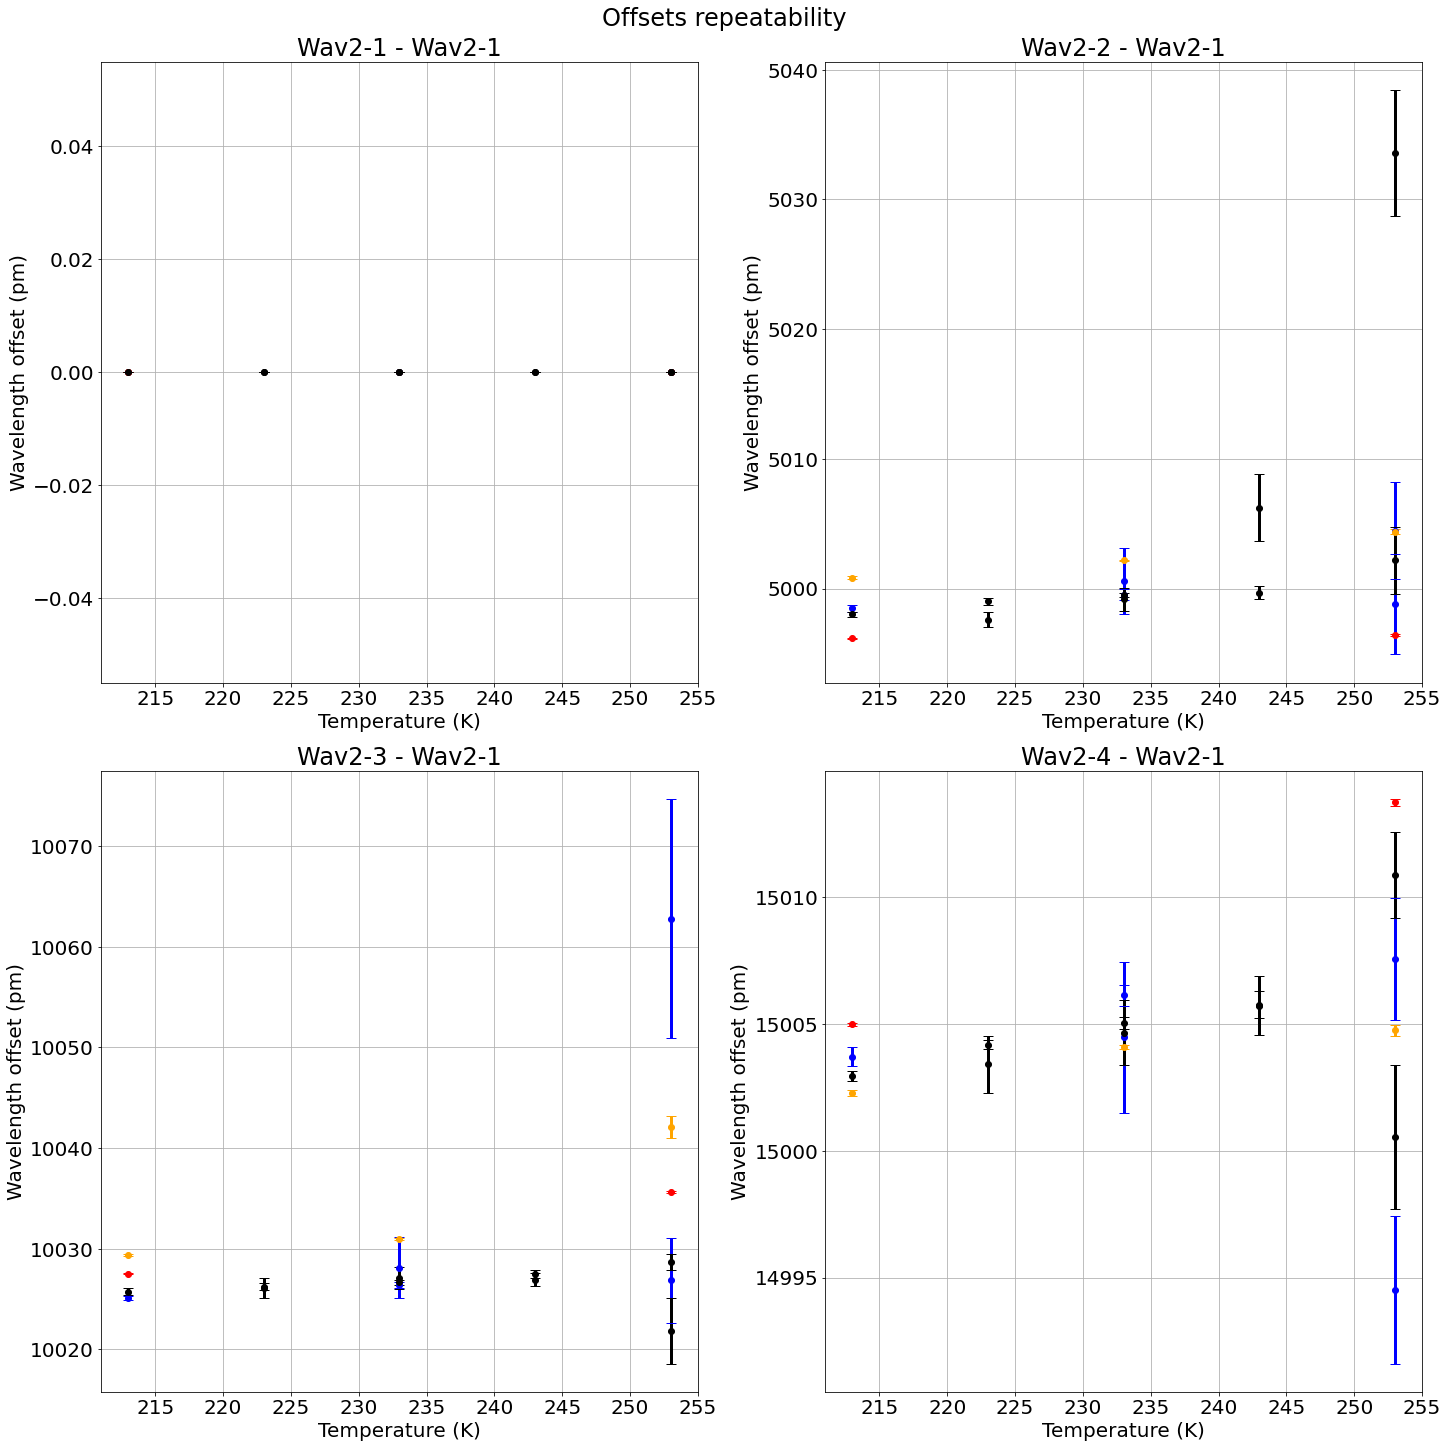

In [24]:
dates = ["20230221", "20230222", "20230223","20230224"]
colors = {"20230221":"blue", "20230222":"orange", "20230223":"red", "20230224":"black"}

fig, axes = graphic_tools.make_figure(ncols=2, nrows=2)
fig.set_size_inches(20, 20)
fig.suptitle("Offsets repeatability")
for date in dates:
    peaks = getters.get_raw_data(path_to_split=path+date+"/", filetype="peaks", pol="Av").sort_values(by="Timestamp").reset_index(drop=True)
    for plateau in  plateaus[date]:
        exclude=["273_down", "273_up","263_up","283_up","293_up","263_down","283_down","293_down"]
        if plateau in exclude:
            continue
        cnt = 0
        t0 = plateaus[date][plateau][0]
        if date=="20230223":
            t0= plateaus[date][plateau][0]+10000
        tf = plateaus[date][plateau][1]
        pcut = peaks.loc[(peaks["Timestamp"]>t0) & (peaks["Timestamp"]<tf)].reset_index(drop=True)
        for sens in peaks.columns:
            if sens == "Timestamp" or sens[3]=="1":
                continue
            axes[cnt].errorbar(int(plateau.split("_")[0]),
                             1e12*np.mean(pcut[sens]-pcut["Wav2-1"]),
                               fmt="o",
                               yerr=1e12*np.std(pcut[sens]-pcut["Wav2-1"]),
                               capsize=5,
                             color=colors[date])
            axes[cnt].set_title(sens + " - Wav2-1")
            axes[cnt].set_xlabel("Temperature (K)")
            axes[cnt].set_ylabel("Wavelength offset (pm)")
            cnt += 1
fig.show()
del fig
del axes